In [20]:
import pandas as pd
import numpy as np
res_train=pd.read_excel('Data_Train_res.xlsx')
res_test=pd.read_excel('Data_Test_res.xlsx')

In [21]:
res_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [22]:
res_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


##### Observation:
    'TITLE','RESTAURANT_ID','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES','COST' are given columns and cost is our target varible

In [23]:
# Checking unique values 
for column in res_train.columns:
    print(f"{column}: Number of unique values {res_train[column].nunique()}")
    print('------------------------------------------------------------')

TITLE: Number of unique values 113
------------------------------------------------------------
RESTAURANT_ID: Number of unique values 11892
------------------------------------------------------------
CUISINES: Number of unique values 4155
------------------------------------------------------------
TIME: Number of unique values 2689
------------------------------------------------------------
CITY: Number of unique values 359
------------------------------------------------------------
LOCALITY: Number of unique values 1416
------------------------------------------------------------
RATING: Number of unique values 32
------------------------------------------------------------
VOTES: Number of unique values 1847
------------------------------------------------------------
COST: Number of unique values 86
------------------------------------------------------------


In [24]:
# Checking unique values 
for column in res_test.columns:
    print(f"{column}: Number of unique values {res_test[column].nunique()}")
    print('------------------------------------------------------------')

TITLE: Number of unique values 86
------------------------------------------------------------
RESTAURANT_ID: Number of unique values 4127
------------------------------------------------------------
CUISINES: Number of unique values 1727
------------------------------------------------------------
TIME: Number of unique values 1183
------------------------------------------------------------
CITY: Number of unique values 151
------------------------------------------------------------
LOCALITY: Number of unique values 834
------------------------------------------------------------
RATING: Number of unique values 31
------------------------------------------------------------
VOTES: Number of unique values 1136
------------------------------------------------------------


In [25]:
res_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [26]:
res_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [27]:
res_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [28]:
res_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [29]:
res_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [30]:
res_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

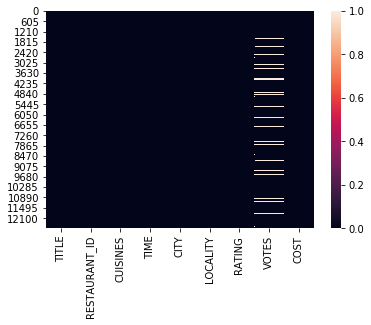

In [31]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(res_train.isnull())
plt.show()

In [32]:
res_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

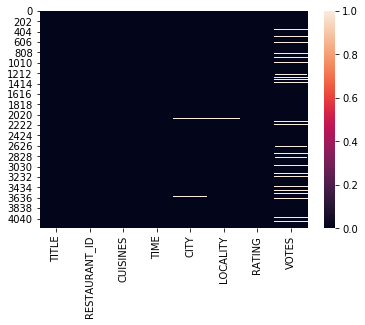

In [33]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(res_test.isnull())
plt.show()

##### Observation:
    There are Null values in data.

In [34]:
# merging test and train data for analysis
res_train['source']='train'
res_test['source']='test'

In [35]:
res=pd.concat([res_train,res_test])

In [36]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [37]:
# checking for duplicate values
res.duplicated().sum()

26

In [38]:
#Removing duplicate values
res=res.drop_duplicates()

In [39]:
res.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

Meraging CITY and LOCALITY columns as Location

In [40]:
res['Location']=res['CITY']+' '+res['LOCALITY']
res.drop(columns=['CITY','LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300.0,train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,NaN,test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,NaN,test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,NaN,test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,NaN,test,Kochi Kochi


In [41]:
res.dropna(subset=['Location'],inplace=True)

In [42]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array
  
#Wrong country names dataset

correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(res.Location,correct_names)    

print(len(names_array))
res['Location']=names_array

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


16747


In [43]:
cuisines_list=[]
for row in res['CUISINES']:
    cuisines_list.append(list(row.split(',')))

res['CUISINES']=cuisines_list

In [44]:
res['CUISINES'].isna().sum()

0

In [45]:
res_cuisines=res['CUISINES'].apply(lambda x: pd.Series(1, x))

In [46]:
res_cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
title_list=[]
for row in res['TITLE']:
    title_list.append(list(row.split(',')))
res['TITLE']=title_list

In [48]:
res_title=res['TITLE'].apply(lambda x: pd.Series(1, x))

In [49]:
res_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
res[res['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,train,Kochi
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,train,Hyderabad
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,test,Kochi
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,test,Kochi


In [51]:
res['RATING'] = res.groupby('CITY').RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [52]:
res['RATING']=res['RATING'].str.extract('(\d+)').astype(float)

In [53]:
res['VOTES'].isna().sum()

1579

In [54]:
res.VOTES.fillna('0',inplace=True)
res['VOTES']=res['VOTES'].str.extract('(\d+)').astype(float)

In [55]:
res.drop(columns='CITY',inplace=True)
res.drop(columns='LOCALITY',inplace=True)
res.drop(columns='CUISINES',inplace=True)

In [56]:
res_cuisines.tail()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
4226,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4227,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
res_City=pd.get_dummies(res['Location'])
res.drop(columns='Location',inplace=True)
res_City.head()

,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kerala,Kochi,Mumbai,Noida,Others,Secunderabad,Telangana,Thane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [58]:
res = pd.concat([res,res_City,res_cuisines,res_title], axis=1)

In [59]:
res.drop(columns='TITLE',inplace=True)

In [60]:
res_column_category = res.select_dtypes(exclude=np.number).columns
res_column_category

Index(['TIME', 'source'], dtype='object')

In [61]:
#res.drop(columns='TIME',inplace=True)
res.drop(columns='TIME',inplace=True)

In [62]:
res.fillna(0,inplace=True)

In [63]:
train_final = res[res.source=="train"]
test_final = res[res.source=="test"]

## Model Training

In [64]:
train_final.shape

(12552, 277)

In [65]:
train_final.drop(columns=["source"],inplace=True)

In [66]:
test_final.drop(columns=["source",'COST'],inplace=True)

In [67]:
x=train_final.drop(['COST'],axis=1)

In [68]:
y=pd.DataFrame(train_final['COST'])

In [69]:
x.shape

(12552, 275)

In [70]:
x.isnull().sum()

RESTAURANT_ID    0
RATING           0
VOTES            0
Andheri          0
Bandra           0
                ..
DHABA            0
MEAT SHOP        0
COCKTAIL BAR     0
PAAN SHOP        0
BHOJANALYA       0
Length: 275, dtype: int64

In [71]:
y.shape

(12552, 1)

In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [73]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue,cv=5)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7066340791333231
1
{'alpha': 1}


In [74]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(alpha=1),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predm))
    print('Mean Squared Error :',mean_squared_error(y_test,predm))
    print('r2_score',r2_score(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.7150515953231393
Error:
Mean Absolute Error : 189.48525500092458
Mean Squared Error : 95404.3126607603
r2_score 0.7410981318046496
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9999950484055851
Error:
Mean Absolute Error : 240.0147351652728
Mean Squared Error : 202264.98168060533
r2_score 0.4511067669046217
*******************************************************************************************************


Score of KNeig

##### Observation:
    1) Score of LinearRegression      = 71%  and r2_score = 74%
    2) Score of DecisionTreeRegressor = 99%  and r2_score = 45%
    3) KNeighborsRegressor            = 33%  and r2_score = 0%
    4) Score of SVR                   = 0%   and r2_score = 0%
    5) Score of Lasso                 = 69%  and r2_score = 71%
    6) Score of Ridge                 = 71%  and r2-score = 74%
    7) Score of ElasticNet            = 24%  and r2_score = 27%
    8) Score of RandomForestRegressor = 95%  and r2_score = 72%
    7) Score of AdaBoostRegressor     = 0%   and r2_score = 0%

### Training our model with corss_val_score so that they won't overfit or underfit

In [75]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(alpha=1),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: [ 6.49435803e-01  7.17487941e-01  7.01304414e-01  7.22070983e-01
 -7.40963148e+10]
Mean score: -14819262956.914658
Standard deviation: 29638525915.22447
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: [0.43092636 0.55593913 0.34234951 0.56352217 0.51540162]
Mean score: 0.481627757379551
Standard deviation: 0.08406974571946989
*******************************************************************************************************


S

##### Observation:
    Ridge is selected as best model. mean score is high and r2_score is high

## Fitting above in test data

In [77]:
# Model which is selected as a best model is GradientBoostingClassifier
rid=Ridge(random_state=42)
rid=rid.fit(x_train,y_train)
#Predicting test data 
pred=rid.predict(test_final)
new_pred=rid.predict(test_final)

In [80]:
restuarantresult=pd.DataFrame(new_pred)

In [81]:
#Saving test data to csv file as resresult
restuarantresult.to_csv('resresult.csv')

In [82]:
restuarantresult.head()

,0
0,901.254064
1,375.342646
2,827.292933
3,359.269313
4,224.253392
